In [1]:
import pandas as pd

In [119]:
df=pd.read_csv(r'C:\Users\explo\Documents\GitHub\Inceptez\Batch-6\13-Linear Regression\Assignment\MarathonData.csv')

In [120]:
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [121]:
df.shape

(87, 10)

In [122]:
df.columns

Index(['id', 'Marathon', 'Name', 'Category', 'km4week', 'sp4week',
       'CrossTraining', 'Wall21', 'MarathonTime', 'CATEGORY'],
      dtype='object')

In [123]:
print(df.shape[0])
for x in df.columns:
    if df[x].dtype=='object' and df[x].nunique()!= df.shape[0]:
        print(x,df[x].nunique())
        #print(df[x].value_counts())

87
Marathon 1
Name 86
Category 6
CrossTraining 5
Wall21 52
CATEGORY 4


In [124]:
df.drop(columns=['id','Name','Marathon'],inplace=True)

In [125]:
df.head()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,M45,137.5,12.258544,NaN,1.32,2.68,A
4,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [126]:
df.describe()

,km4week,sp4week,MarathonTime
count,87.000000,87.000000,87.000000
mean,62.347126,139.840706,3.319080
std,26.956019,1191.427864,0.376923
min,17.900000,8.031414,2.370000
25%,44.200000,11.498168,3.045000
50%,58.800000,12.163424,3.320000
75%,77.500000,12.854036,3.605000
max,137.500000,11125.000000,3.980000


In [127]:
df.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

In [128]:
df.drop(columns=['CrossTraining'],inplace=True)

In [129]:
df.head()

,Category,km4week,sp4week,Wall21,MarathonTime,CATEGORY
0,MAM,132.8,14.434783,1.16,2.37,A
1,MAM,68.6,13.674419,1.23,2.59,A
2,MAM,82.7,13.520436,1.30,2.66,A
3,M45,137.5,12.258544,1.32,2.68,A
4,MAM,84.6,13.945055,1.36,2.74,A


In [130]:
df.Category.unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', nan, 'WAM'], dtype=object)

In [131]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df['Category'] = labelencoder_Y.fit_transform(list(df['Category']))

In [132]:
df['CATEGORY'] = labelencoder_Y.fit_transform(df['CATEGORY'])

In [133]:
df.head()

,Category,km4week,sp4week,Wall21,MarathonTime,CATEGORY
0,4,132.8,14.434783,1.16,2.37,0
1,4,68.6,13.674419,1.23,2.59,0
2,4,82.7,13.520436,1.30,2.66,0
3,1,137.5,12.258544,1.32,2.68,0
4,4,84.6,13.945055,1.36,2.74,0


In [134]:
df.Category.unique()

array([4, 1, 0, 2, 3, 6, 5], dtype=int64)

In [135]:
import numpy as np
df['Wall21']=df['Wall21'].replace(' -   ',np.NaN)

In [136]:
df.isna().sum()

Category        0
km4week         0
sp4week         0
Wall21          6
MarathonTime    0
CATEGORY        0
dtype: int64

In [137]:
X=df.iloc[:,:].values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imputer.fit(df[['Wall21']])
df['Wall21']=imputer.transform(df[['Wall21']]).ravel()

In [138]:
df.isna().sum()

Category        0
km4week         0
sp4week         0
Wall21          0
MarathonTime    0
CATEGORY        0
dtype: int64

In [139]:
df.describe()

,Category,km4week,sp4week,Wall21,MarathonTime,CATEGORY
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,2.850575,62.347126,139.840706,1.629885,3.319080,1.390805
std,1.889560,26.956019,1191.427864,0.203032,0.376923,1.060455
min,0.000000,17.900000,8.031414,1.160000,2.370000,0.000000
25%,1.000000,44.200000,11.498168,1.490000,3.045000,1.000000
50%,4.000000,58.800000,12.163424,1.620000,3.320000,1.000000
75%,4.000000,77.500000,12.854036,1.755000,3.605000,2.000000
max,6.000000,137.500000,11125.000000,2.050000,3.980000,3.000000


In [140]:
import numpy as np

def outliers_iqr(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
Category        87 non-null int64
km4week         87 non-null float64
sp4week         87 non-null float64
Wall21          87 non-null float64
MarathonTime    87 non-null float64
CATEGORY        87 non-null int64
dtypes: float64(4), int64(2)
memory usage: 4.2 KB


In [143]:
for x in df.columns:
    #print(x,outliers_iqr(df[x]))
    ind,val=outliers_iqr(df[x])
    if ind!=[]:
        print(x,ind,val)
        for i in ind:
            df.loc[i,x]=df[x].median()
        #df.drop(index=ind,inplace=True)
        #df[x+'_log']=np.log(df[x])

km4week [0, 3, 26] [132.8, 137.5, 129.6]
sp4week [15, 19, 76, 81] [14.970491800000001, 8.031413613, 8.337931034, 11125.0]


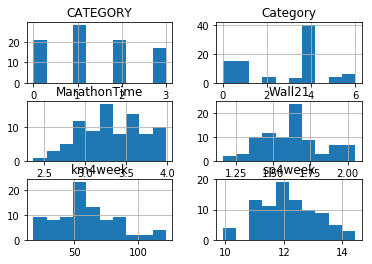

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist()
plt.show()

In [145]:
for x in df.columns:
    print(x,outliers_iqr(df[x]))

Category ([], [])
km4week ([52], [121.7])
sp4week ([0], [14.43478261])
Wall21 ([], [])
MarathonTime ([], [])
CATEGORY ([], [])


              Category   km4week   sp4week    Wall21  MarathonTime  CATEGORY
Category      1.000000 -0.042405  0.020462  0.029355      0.064457  0.093314
km4week      -0.042405  1.000000  0.141041 -0.482328     -0.523020 -0.517719
sp4week       0.020462  0.141041  1.000000 -0.675678     -0.700033 -0.649318
Wall21        0.029355 -0.482328 -0.675678  1.000000      0.942158  0.894015
MarathonTime  0.064457 -0.523020 -0.700033  0.942158      1.000000  0.958870
CATEGORY      0.093314 -0.517719 -0.649318  0.894015      0.958870  1.000000


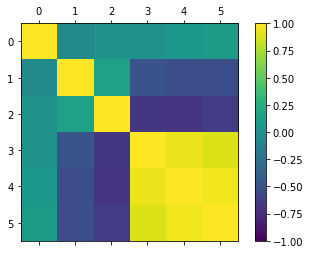

In [146]:
cor = df.corr()
print(cor)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax =1)
fig.colorbar(cax)
ticks=np.arange(0,df.shape[1],1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D614C36D8>,
      dtype=object)

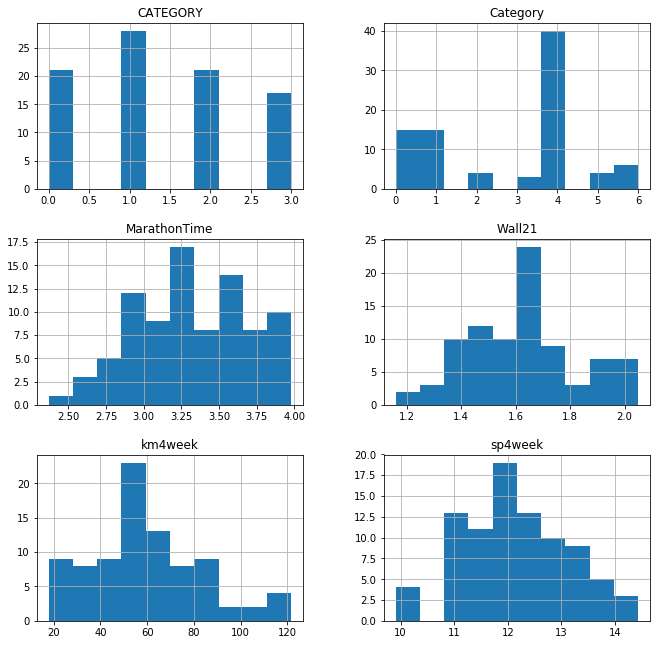

In [148]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [149]:
df.columns

Index(['Category', 'km4week', 'sp4week', 'Wall21', 'MarathonTime', 'CATEGORY'], dtype='object')

In [155]:
a=['Category', 'Wall21', 'CATEGORY','km4week', 'sp4week']

In [156]:
X=df[a]
Y=df['MarathonTime']

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=123)

In [158]:
Y_test

4     2.74
84    3.94
56    3.50
35    3.22
45    3.33
28    3.15
71    3.69
53    3.47
80    3.90
23    3.09
60    3.55
8     2.83
51    3.45
81    3.92
29    3.16
54    3.47
72    3.69
58    3.52
37    3.24
38    3.24
79    3.90
59    3.52
Name: MarathonTime, dtype: float64

In [159]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_train_pred=linreg.predict(X_train)
Y_pred = linreg.predict(X_test)

In [160]:
print(linreg.intercept_)
print(linreg.coef_)

2.0739293182441685
[-4.07586723e-03  8.59780080e-01  1.69823115e-01 -5.98506289e-04
 -2.84540003e-02]


In [161]:
from sklearn import metrics
print('Train MSE:', metrics.mean_squared_error(Y_train, Y_train_pred))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)))
print('Test MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('Test R2:', round(metrics.r2_score(Y_test,Y_pred),3))

Train MSE: 0.0053581055538656774
Train RMSE: 0.07319908164632721
Test MSE: 0.0077843828824634915
Test RMSE: 0.08822914984552153
Test R2: 0.927


In [93]:
print('Train MAPE:',np.mean(np.abs((Y_train - Y_train_pred)/Y_train)) * 100) #MAPE for train
print('Test MAPE:',np.mean(np.abs((Y_test - Y_pred)/Y_test)) * 100) #MAPE for train

Train MAPE: 1.7342268498850375
Test MAPE: 2.775869287675816
